In [1]:
from matplotlib import pyplot as plt
from fetch_dataframe_from_server import fetch_dataframe_from_server
import numpy as np
from cycler import cycler

In [2]:
sql_statements = [
	"""SELECT scenario_name, ranking_error, impact_factor, avg(result) AS result FROM `do_preprocessing`
	WHERE ranking_error = 'spearman_rankk_correlation_no_normalisation' AND scenario_name = 'QBF-2016'
	GROUP BY scenario_name, ranking_error, impact_factor""",
	"""SELECT scenario_name, ranking_error, impact_factor, avg(result) AS result FROM `do_preprocessing`
 	WHERE ranking_error = 'spearman_rank_correlation' AND scenario_name = 'QBF-2016'
	GROUP BY scenario_name, ranking_error, impact_factor"""
]
legend_names = ["not [0,1] scaled loss function and performance data", "[0,1] scaled loss function and performacne data"]

c:\Users\I3lac\Desktop\BachelorThesisAnalysis\evalaution_environment\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\I3lac\Desktop\BachelorThesisAnalysis\evalaution_environment\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


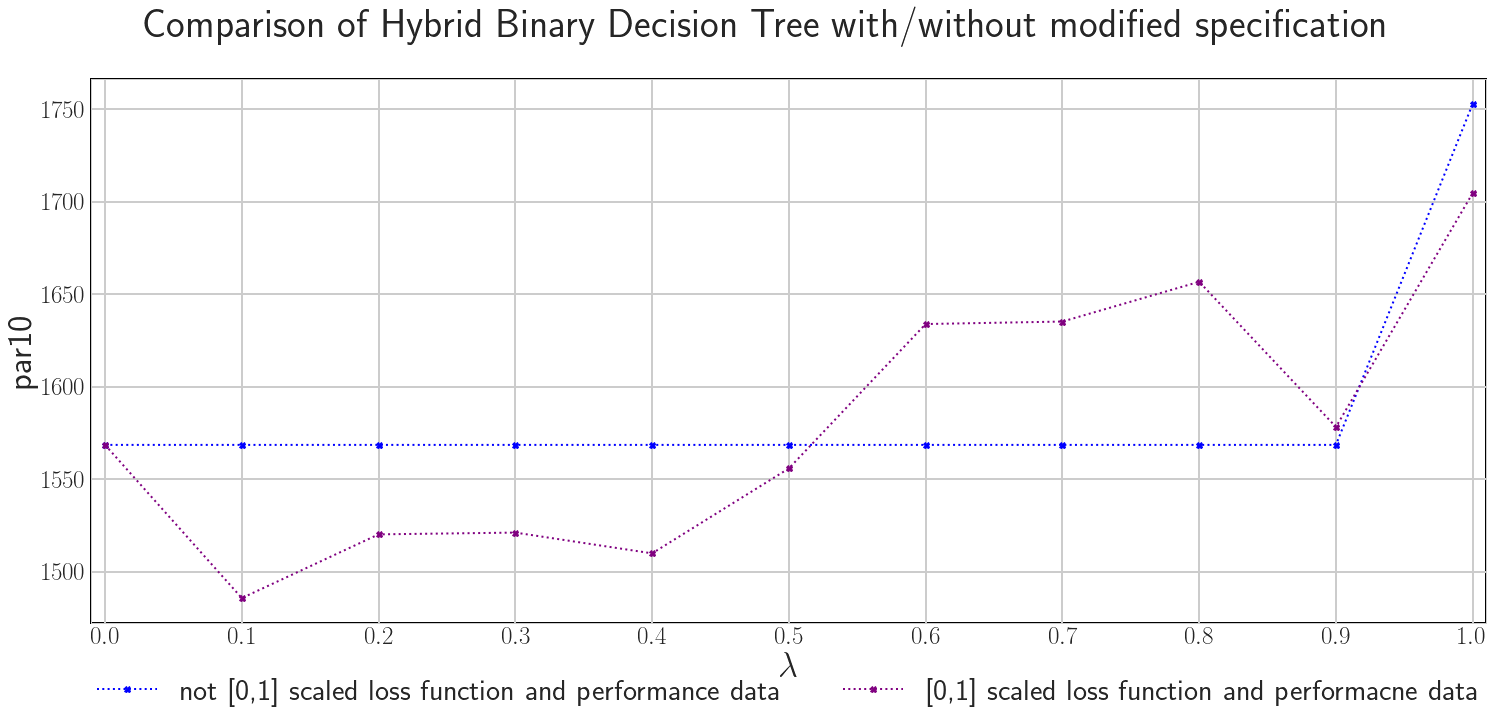

In [3]:
metric_name = 'par10'
table_names = 'do_preprocessing'
scenario_names = 'QBF-2016'

fig, axs = plt.subplots()


fig.suptitle('Comparison of Hybrid Binary Decision Tree with/without modified specification', fontsize=40)
fig.set_size_inches(25, 10, forward=True)
axs.grid(linewidth=2)
axs.set_prop_cycle(cycler(color=["blue", "purple"]))
axs.set_xlim(-0.01, 1.01)
axs.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 
		0.8, 0.9, 1])
axs.set_xlabel(r"$\lambda$", fontsize=35)
axs.set_ylabel(metric_name, fontsize=35)
axs.patch.set_edgecolor("black")
axs.patch.set_linewidth("2")
axs.patch.set_edgecolor("black")
axs.patch.set_linewidth("2")

axs.tick_params(axis="both", which="major", labelsize=25)
for sql_statement, legend_name in zip(sql_statements, legend_names):
	df = fetch_dataframe_from_server(sql_statement)
	axs.plot(df["impact_factor"], df["result"], "X:", label=legend_name, linewidth=2)

plt.legend(fontsize=30, loc="upper center", bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3)

plt.savefig('./Comparison_of_Hybrid_Binary_Decision_with-without_modified_specification' + ".png", bbox_inches="tight")